In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
#load the data
data = pd.read_csv('insurance2.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


## Data exploration 

In [8]:
data.shape

(1338, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


<AxesSubplot:>

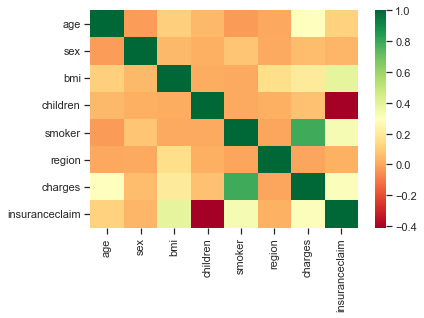

In [33]:
sns.heatmap(data.corr(), cmap = 'RdYlGn')

In [13]:
#check for missing values
data.isnull().any()
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [4]:
#unique value count
data.nunique()

age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64

In [5]:
#frequency count
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [15]:
#convert categorical variables to dummy variables
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [21]:
#applying function to entire group
data_region = data.groupby(by = ['region']).mean()
data_region.head()

,age,sex,bmi,children,smoker,charges,insuranceclaim
region,,,,,,,
0,39.268519,0.503086,29.173503,1.046296,0.206790,13406.384516,0.592593
1,39.196923,0.495385,29.199785,1.147692,0.178462,12417.575374,0.501538
2,38.939560,0.519231,33.355989,1.049451,0.250000,14735.411438,0.673077
3,39.455385,0.501538,30.596615,1.141538,0.178462,12346.937377,0.563077


## Data visualization

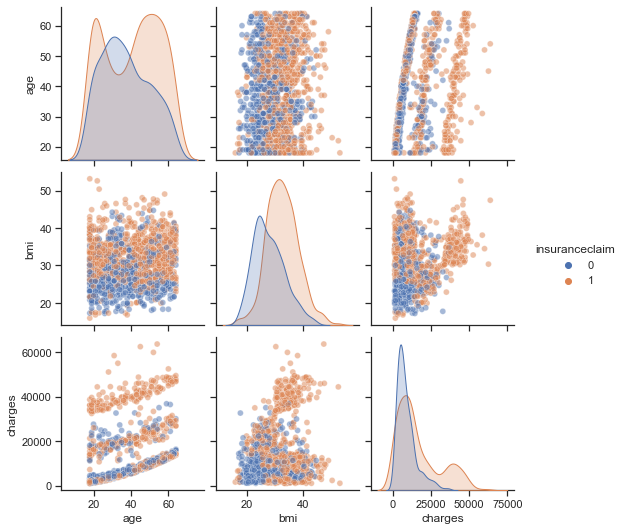

In [25]:
sns.set_theme(style="ticks")
sns.pairplot(data[['age', 'bmi', 'charges', 'insuranceclaim']], hue = 'insuranceclaim', plot_kws=dict(alpha=0.5))

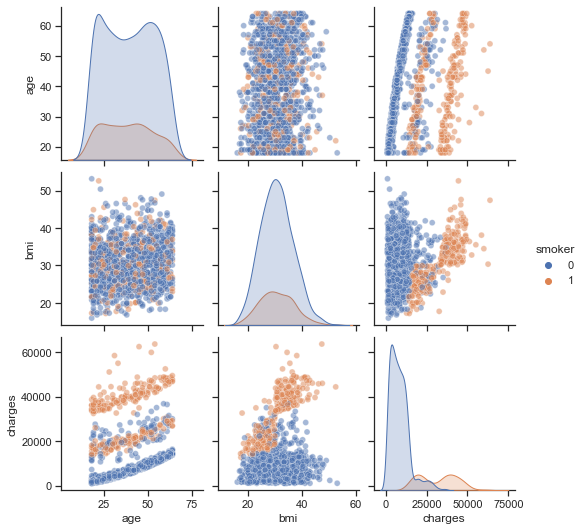

In [26]:
sns.pairplot(data[['age', 'bmi', 'charges', 'smoker']], hue = 'smoker', plot_kws=dict(alpha=0.5))

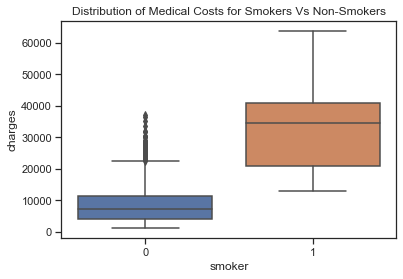

In [29]:
plt.title('Distribution of Medical Costs for Smokers Vs Non-Smokers')
ax = sns.boxplot(x="smoker", y="charges", data=data)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

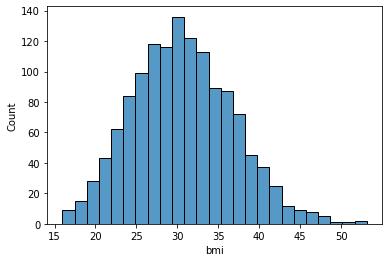

In [9]:
sns.histplot(data['bmi'])

<AxesSubplot:xlabel='age', ylabel='charges'>

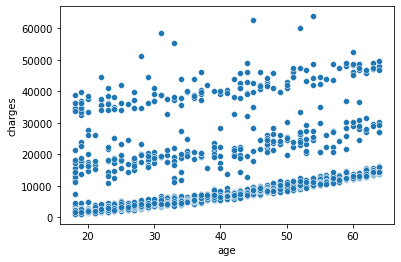

In [12]:
sns.scatterplot(x='age', y='charges', data=data)

## Model prediction Insuranceclaim

In [25]:
#split the data into the variable that will be predicted (y) en the explainatory variables X
X = data.iloc[:, :7]
y = data.iloc[:, -1:]

In [38]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [39]:
y.head()

,insuranceclaim
0,1
1,1
2,0
3,0
4,1


In [26]:
#Assigning training and testing value
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Accuracy ::  0.9589552238805971
Precision ::  0.9664429530201343


C:\Users\Bas\AppData\Local\Temp/ipykernel_17784/3342789617.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


[Text(0.5, 12.5, 'predict'), Text(30.5, 0.5, 'true')]

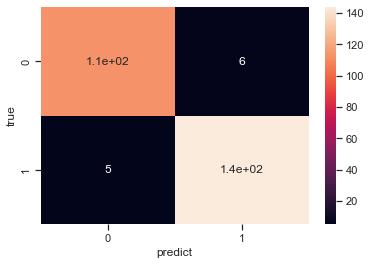

In [41]:
#Using RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=1700,random_state=5)
rf.fit(X_train, y_train)
predict = rf.predict(X_test)

from sklearn import metrics
print('Accuracy : ',metrics.accuracy_score(y_test,predict))
print('Precision : ',metrics.precision_score(y_test,predict))


from sklearn.metrics import accuracy_score,confusion_matrix
Rf_cm = confusion_matrix(predict,y_test)
ax = sns.heatmap(Rf_cm,annot=True)
ax.set(xlabel='predict', ylabel='true')

In [42]:
#Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
model1 = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='log2')

param_grid = {
    'n_estimators' : [50,1000],
    'max_depth': [1,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state':[0,1000]
}


CV_rfc = GridSearchCV(estimator=model1, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print (CV_rfc.best_params_)

C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selec

C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selec

C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selec

C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selec

C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selec

{'max_depth': 100, 'max_features': 'auto', 'n_estimators': 50, 'random_state': 0}


C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Accuracy :  0.996268656716418
Precision :  1.0


[Text(0.5, 15.0, 'predict'), Text(33.0, 0.5, 'true')]

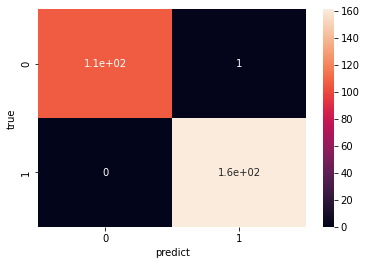

In [37]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predict = dt.predict(X_test)

from sklearn import metrics
print('Accuracy : ',metrics.accuracy_score(y_test,predict))
print('Precision : ',metrics.precision_score(y_test,predict))


from sklearn.metrics import accuracy_score,confusion_matrix
Rf_cm = confusion_matrix(predict,y_test)
Rf_cm
ax = sns.heatmap(Rf_cm,annot=True)
ax.set(xlabel='predict', ylabel='true')


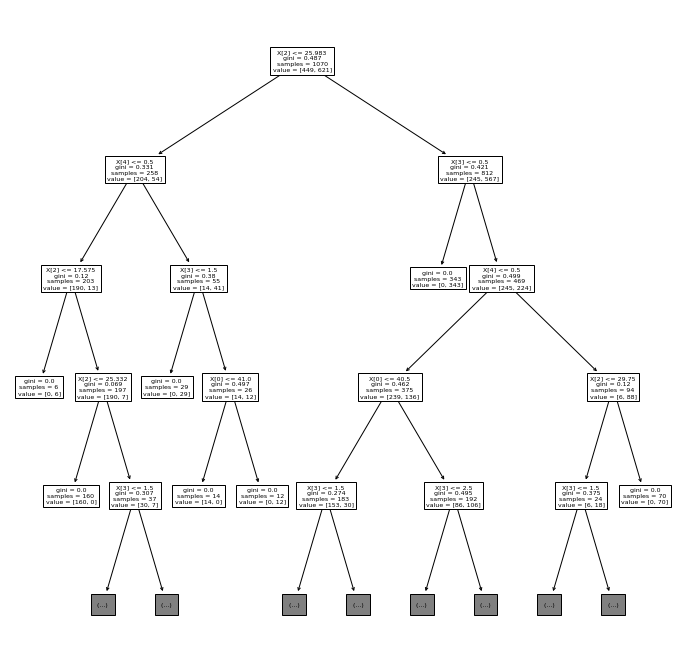

In [35]:
plt.figure(figsize=(12,12))
plot_tree(dt, max_depth = 4)
plt.show()

Accuracy :  0.8246268656716418
Precision :  0.8402366863905325


C:\Users\Bas\miniconda3\envs\mediriskprep\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Text(0.5, 15.0, 'predict'), Text(33.0, 0.5, 'true')]

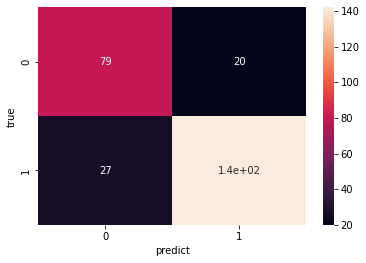

In [39]:
# logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
predict = clf.predict(X_test)


print('Accuracy : ',metrics.accuracy_score(y_test,predict))
print('Precision : ',metrics.precision_score(y_test,predict))


from sklearn.metrics import accuracy_score,confusion_matrix
Rf_cm = confusion_matrix(predict,y_test)
ax = sns.heatmap(Rf_cm,annot=True)
ax.set(xlabel='predict', ylabel='true')

In [44]:
print(clf.coef_)

[[-2.85009022e-02 -6.18077392e-02  6.62025526e-02 -1.17271920e+00
   6.81448516e-02 -1.41890344e-01  1.03830611e-04]]


In [45]:
print(clf.intercept_)

[-0.12136606]


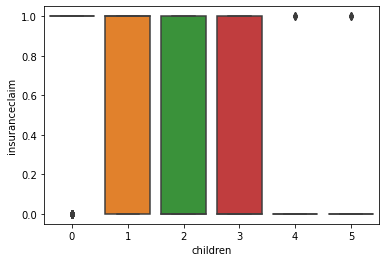